<a href="https://colab.research.google.com/github/dewnijayasuriya/DL-LABS/blob/main/LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

In [ ]:
#Q1
arr = np.random.exponential(scale=1.0, size=(4, 4))
print(arr)

[[0.53420794 0.20446233 0.09984158 1.03655772]
 [0.12640599 0.12361269 0.1082415  0.2965969 ]
 [0.15946337 2.95279354 0.11366159 1.63166736]
 [0.21074768 0.26248789 0.08462392 0.21683884]]


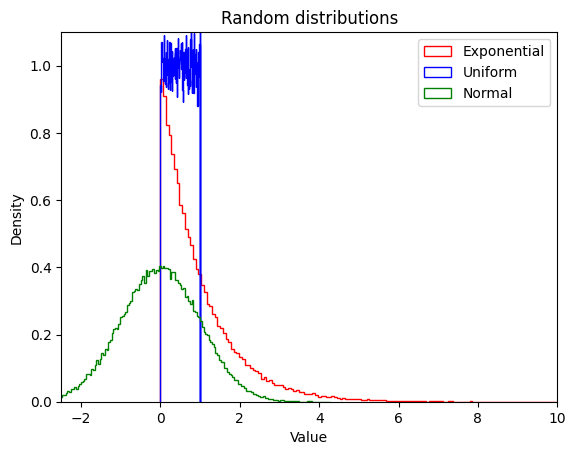

In [ ]:
#Q2
exp_data = np.random.exponential(scale=1.0, size=100000) #exponential distribution
uni_data = np.random.rand(100000) #uniform distribution
norm_data = np.random.randn(100000) #normal distribution

#plot histrograms
plt.hist(exp_data, density=True, bins=200, histtype="step", color="red", label="Exponential")
plt.hist(uni_data, density=True, bins=200, histtype="step", color="blue", label="Uniform")
plt.hist(norm_data, density=True, bins=200, histtype="step", color="green", label="Normal")

plt.axis([-2.5, 10, 0, 1.1])
plt.legend(loc = "upper right")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()



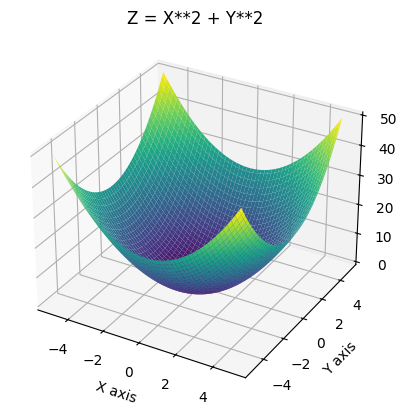

In [ ]:
#Q3

# Create grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis")

ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")
plt.title("Z = X**2 + Y**2")
plt.show()



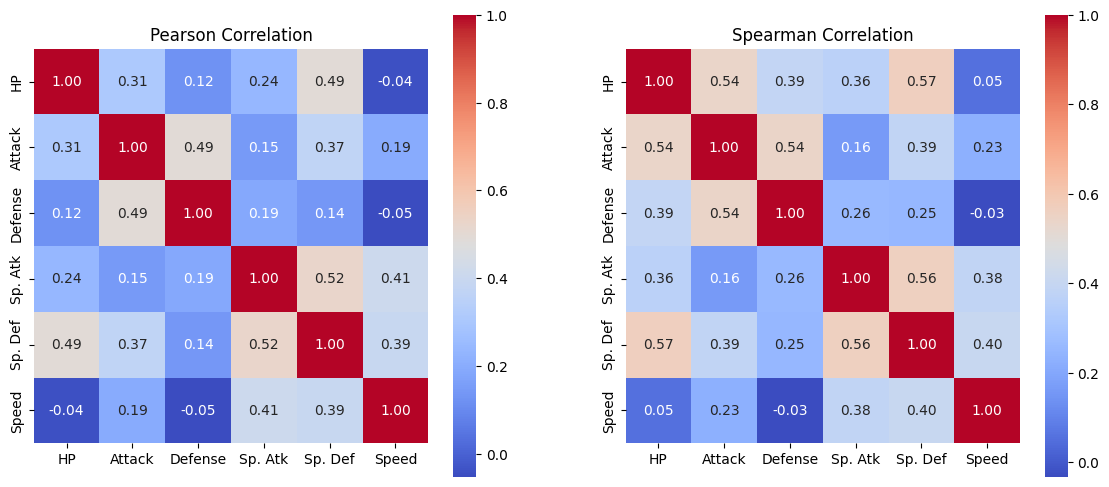

In [ ]:
#Q4
!wget -q https://elitedatascience.com/wp-content/uploads/2022/07/Pokemon.csv
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')

# Select only the required numeric stats
features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats_df = df[features]

# Pearson correlation
pearson_corr = stats_df.corr(method='pearson')

# Spearman correlation
spearman_corr = stats_df.corr(method='spearman')

# Plot heatmaps side-by-side
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Pearson Correlation")

plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Spearman Correlation")

plt.show()




Task 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Au_nanoparticle_dataset.csv')

In [ ]:
df.head() #Display how the dataset appears

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [ ]:
df.columns  #column names of the dataset

Index(['ID', 'T', 'tau', 'time', 'N_total', 'N_bulk', 'N_surface', 'Volume',
       'R_min', 'R_max',
       ...
       'q6q6_S14', 'q6q6_S15', 'q6q6_S16', 'q6q6_S17', 'q6q6_S18', 'q6q6_S19',
       'q6q6_S20', 'q6q6_S20+', 'Total_E', 'Formation_E'],
      dtype='object', length=185)

In [ ]:
#Q1
new_df = df.drop(['N_total', 'N_bulk', 'N_surface', 'R_avg'], axis=1)
new_df.head()

,ID,T,tau,time,Volume,R_min,R_max,R_diff,R_std,R_skew,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,2.710000e-26,15.5898,19.4516,3.8618,0.6230,-0.0435,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,2.780000e-26,15.3996,24.1755,8.7760,0.9295,2.0673,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,7.850000e-26,21.9199,31.0305,9.1106,1.0701,0.3618,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,1.220000e-25,23.2542,37.8795,14.6253,2.3732,0.1431,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,1.860000e-25,27.1200,39.7614,12.6415,1.9397,-0.3849,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [ ]:
#Q2
new_df.head(20)

,ID,T,tau,time,Volume,R_min,R_max,R_diff,R_std,R_skew,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,2.710000e-26,15.5898,19.4516,3.8618,0.6230,-0.0435,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,2.780000e-26,15.3996,24.1755,8.7760,0.9295,2.0673,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,7.850000e-26,21.9199,31.0305,9.1106,1.0701,0.3618,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,1.220000e-25,23.2542,37.8795,14.6253,2.3732,0.1431,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,1.860000e-25,27.1200,39.7614,12.6415,1.9397,-0.3849,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390
5,6,273,0.000025,6,2.260000e-25,33.2496,42.9612,9.7116,1.0219,0.3804,...,0,0,0,0,0,0,0,0,-50687.6660,1608.5840
6,7,273,0.000025,7,2.340000e-25,33.6164,41.6168,8.0004,0.8979,0.3041,...,0,0,0,0,0,0,0,0,-52334.7900,1603.6600
7,8,273,0.000025,8,2.360000e-25,34.5185,41.4386,6.9201,0.8595,0.3214,...,0,0,0,0,0,0,0,0,-52912.3150,1620.4550
8,9,273,0.000025,9,2.370000e-25,34.7525,41.5998,6.8473,0.8483,0.3588,...,0,0,0,0,0,0,0,0,-53212.1320,1606.0680
9,10,273,0.000025,10,2.380000e-25,34.7870,41.5401,6.7531,0.8308,0.3666,...,0,0,0,0,0,0,0,0,-53347.8030,1611.1570


In [ ]:
#Q3
four_cols = df[['N_total', 'N_bulk', 'N_surface', 'R_avg']]
stats_result = four_cols.describe().loc[['mean', 'std', '25%', '50%', '75%']]

print(stats_result)

          N_total       N_bulk   N_surface      R_avg
mean  3476.786500  2521.550250   955.23625  20.654363
std   3679.286769  2976.232459   721.87022   7.610716
25%   1061.000000   618.750000   437.00000  15.160725
50%   1867.000000  1199.000000   666.00000  18.629250
75%   4503.000000  3183.000000  1301.75000  25.525125


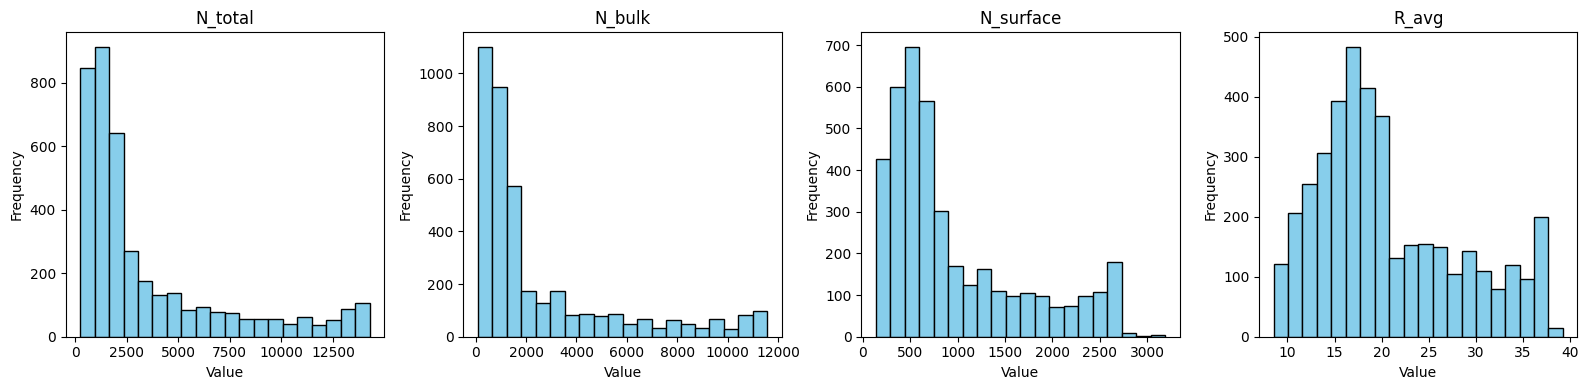

In [ ]:
#Q4
plt.figure(figsize=(16,4))

for i, col in enumerate(four_cols.columns):
    plt.subplot(1, 4, i+1)
    plt.hist(four_cols[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

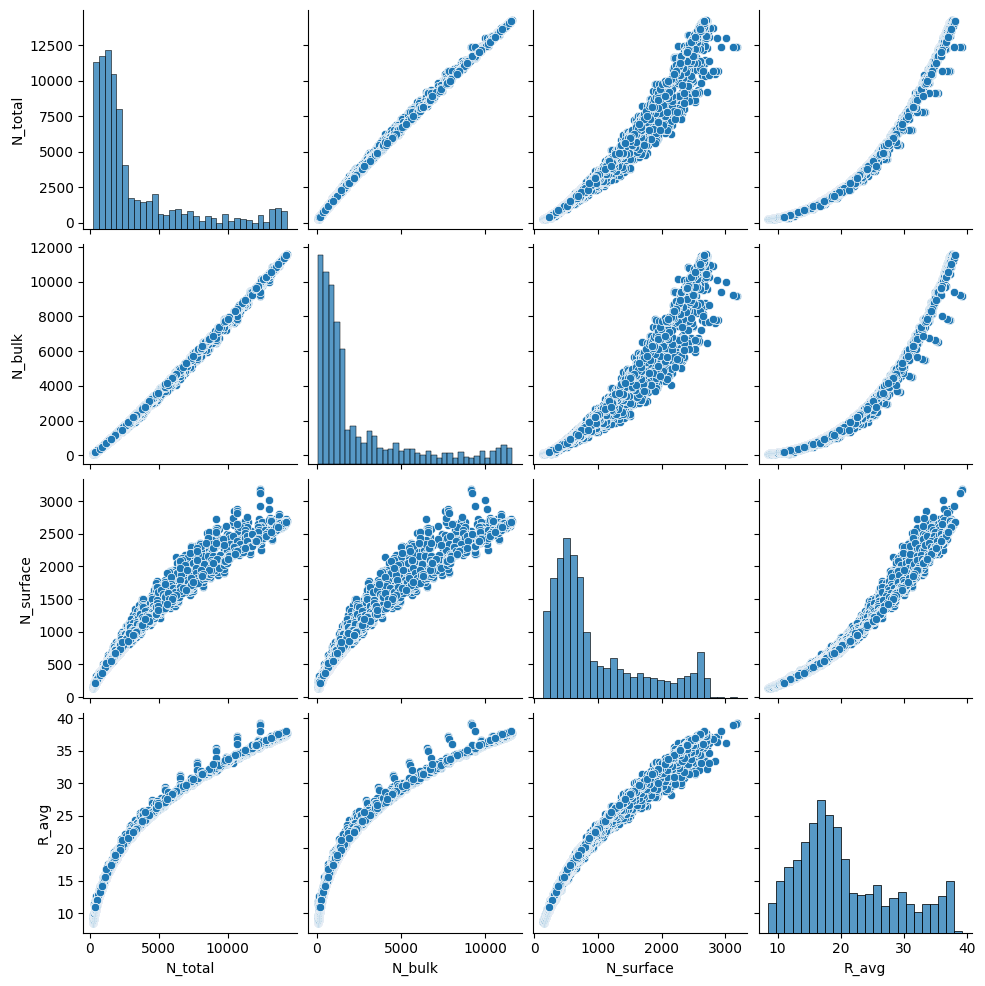

In [ ]:
#Q5
sns.pairplot(four_cols, diag_kind='hist')
plt.show()

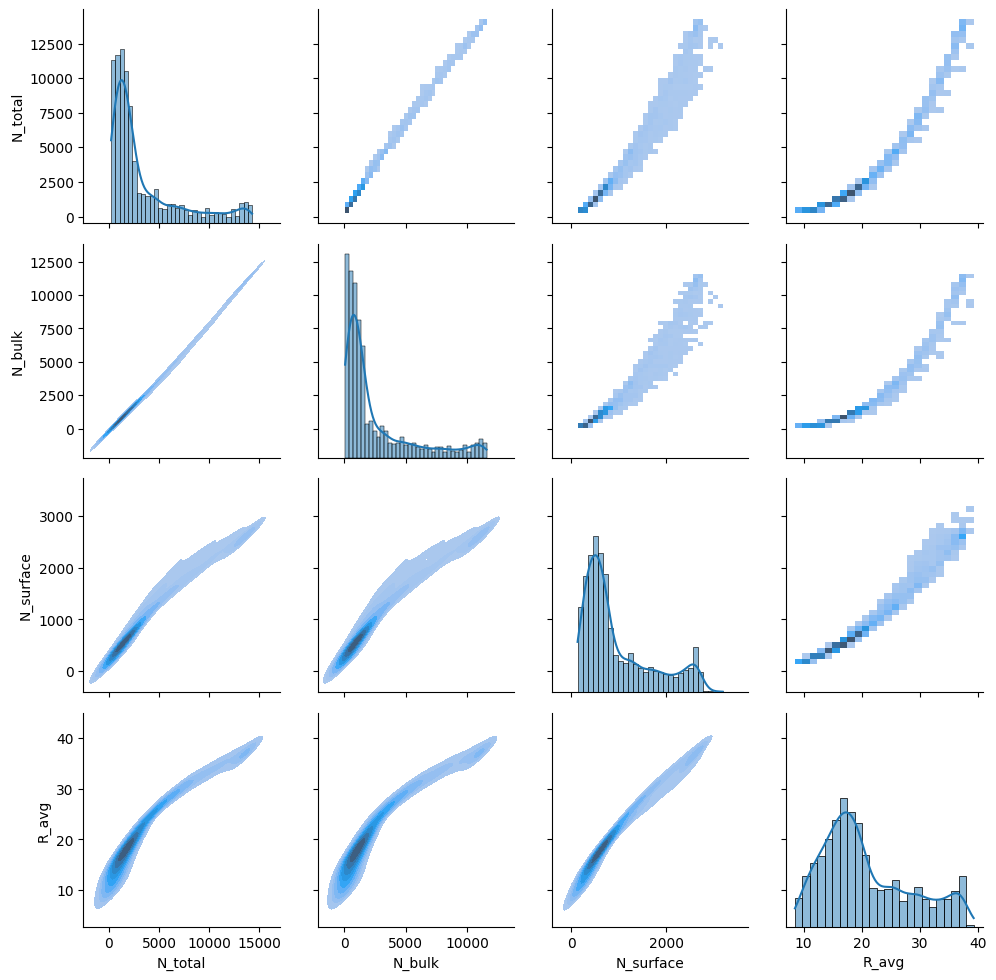

In [ ]:
#Q6

# Create PairGrid
g = sns.PairGrid(four_cols)

# Upper = bivariate histogram
g.map_upper(sns.histplot)

#a)
# Diagonal = histogram + KDE
g.map_diag(sns.histplot, kde=True)

#b)
# Lower = bivariate KDE plot
g.map_lower(sns.kdeplot, fill=True)

plt.show()